In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix
#from wordcloud import WordCloud, STOPWORDS
#from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('/Users/ankusmanish/Desktop/Desktop/Training/Datasets/Week13/twitter/train_E6oV3lV.csv')
train = train.reindex(columns=['id', 'tweet', 'label'])
test = pd.read_csv('/Users/ankusmanish/Desktop/Desktop/Training/Datasets/Week13/twitter/test_tweets_anuFYb8.csv')
test = test.reindex(columns=['id', 'tweet', 'label'])
train.drop(['id'], axis = 1, inplace = True)
test.drop(['id'], axis = 1, inplace = True)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
tweet    31962 non-null object
label    31962 non-null int64
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [4]:
train.head()

,tweet,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
tweet    17197 non-null object
label    0 non-null float64
dtypes: float64(1), object(1)
memory usage: 268.8+ KB


In [6]:
test.head()

,tweet,label
0,#studiolife #aislife #requires #passion #dedic...,NaN
1,@user #white #supremacists want everyone to s...,NaN
2,safe ways to heal your #acne!! #altwaystohe...,NaN
3,is the hp and the cursed child book up for res...,NaN
4,"3rd #bihday to my amazing, hilarious #nephew...",NaN


In [10]:
text = train['tweet'].values

In [11]:
len(text)

31962

In [12]:
text_data = []

for i in range(len(text)):
    review = text[i].lower()
    
    review = re.sub('[^a-z]+', ' ',review)
    
    ps = PorterStemmer()
    
    review = [ps.stem(i) for i in word_tokenize(review) if i not in stopwords.words('english')]
    
    review = ' '.join(review)
    
    text_data.append(review)

In [14]:
cv = CountVectorizer()
X = cv.fit_transform(text_data).toarray()
y = train['label'].values

In [15]:
X.shape

(31962, 31303)

In [16]:
print(len(cv.get_feature_names())) # bag of words

31303


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22373, 31303), (9589, 31303), (22373,), (9589,))

In [19]:
def model(X_train, y_train, X_test, y_test):
    classification_algos = {'MultinomialNB': MultinomialNB(),
                            'GaussianNB': GaussianNB(),
                            'BernoulliNB': BernoulliNB()}
    
    best_classifier = {'obj':0, 'accuracy': 0}
    
    t = PrettyTable(['Algorithms', 'Accuracy'])
    for key, model in classification_algos.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        t.add_row([key, accuracy_score(y_test, y_pred)])
        
        sea.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'summer')
        plt.title(key, pad = 15)
        plt.show()
        
        if accuracy_score(y_test, y_pred) > best_classifier['accuracy']:
            best_classifier['obj'] = model
            best_classifier['accuracy'] = accuracy_score(y_test, y_pred)
            
    print(t)
    return best_classifier['obj']

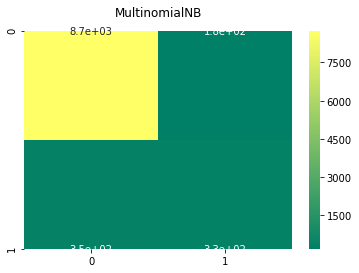

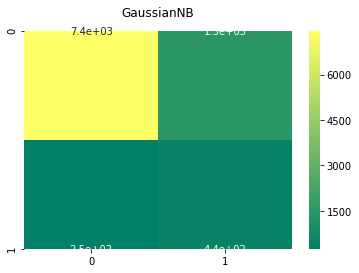

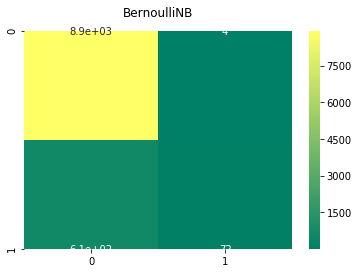

+---------------+--------------------+
|   Algorithms  |      Accuracy      |
+---------------+--------------------+
| MultinomialNB | 0.9441026175826468 |
|   GaussianNB  | 0.8196892272395453 |
|  BernoulliNB  | 0.9357597246845344 |
+---------------+--------------------+


In [20]:
best_classifier = model(X_train, y_train, X_test, y_test)

## Predicting on the test data

In [21]:
test = test['tweet'].values

In [22]:
test_data = []

for i in range(len(test)):
    review = test[i].lower()
    
    review = re.sub('[^a-z]+', ' ',review)
    
    ps = PorterStemmer()
    
    review = [ps.stem(i) for i in word_tokenize(review) if i not in stopwords.words('english')]
    
    review = ' '.join(review)
    
    test_data.append(review)

In [24]:
X_test = cv.transform(test_data).toarray()

In [25]:
X_test.shape

(17197, 31303)

In [26]:
y_pred = best_classifier.predict(X_test)

In [29]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])